### Script to process and clean the COSMOS snow pillow data

- cr_swe: Cosmic ray derived swe [cm]
- swe: Colocated snow pillow derived swe [cm]

In [1]:
d = pd.read_excel('./data/COSMOS_VallesCaldera_tbb.xlsx')

In [2]:
swe = pd.DataFrame()
cr_swe = pd.DataFrame()

### Disaggregate the Excel file

In [3]:
tmp = pd.DataFrame({'dt':d.dt1.as_matrix(),'swe':d.swe1.as_matrix()})
swe = swe.append(tmp)
len(swe)

35228

In [4]:
tmp = pd.DataFrame({'dt':d.dt3.as_matrix(),'swe':d.swe3.as_matrix()})
swe = swe.append(tmp)
len(swe)

70456

In [5]:
tmp = pd.DataFrame({'dt':d.dt4.as_matrix(),'swe':d.swe4.as_matrix()})
swe = swe.append(tmp)
len(swe)

105684

In [6]:
tmp = pd.DataFrame({'dt':d.dt5.as_matrix(),'swe':d.swe5.as_matrix()})
swe = swe.append(tmp)
len(swe)

140912

In [7]:
tmp = pd.DataFrame({'dt':d.dt1.as_matrix(),'cr_swe':d.cr_swe1.as_matrix()})
cr_swe = cr_swe.append(tmp)
len(cr_swe)

35228

In [8]:
tmp = pd.DataFrame({'dt':d.dt2.as_matrix(),'cr_swe':d.cr_swe2.as_matrix()})
cr_swe = cr_swe.append(tmp)
len(cr_swe)

70456

In [9]:
tmp = pd.DataFrame({'dt':d.dt4.as_matrix(),'cr_swe':d.cr_swe4.as_matrix()})
cr_swe = cr_swe.append(tmp)
len(cr_swe)

105684

In [10]:
tmp = pd.DataFrame({'dt':d.dt5.as_matrix(),'cr_swe':d.cr_swe5.as_matrix()})
cr_swe = cr_swe.append(tmp)
len(cr_swe)

140912

In [11]:
#swe.dropna(inplace=True)

In [12]:
#cr_swe.dropna(inplace=True)

### Convert the time stamps to indicies

In [13]:
swe.index = pd.DatetimeIndex(swe.dt)

In [14]:
del swe['dt']

In [15]:
cr_swe.index = pd.DatetimeIndex(cr_swe.dt)

In [16]:
del cr_swe['dt']

### Plot the data

In [24]:
np.arange(2009,2012)

array([2009, 2010, 2011])

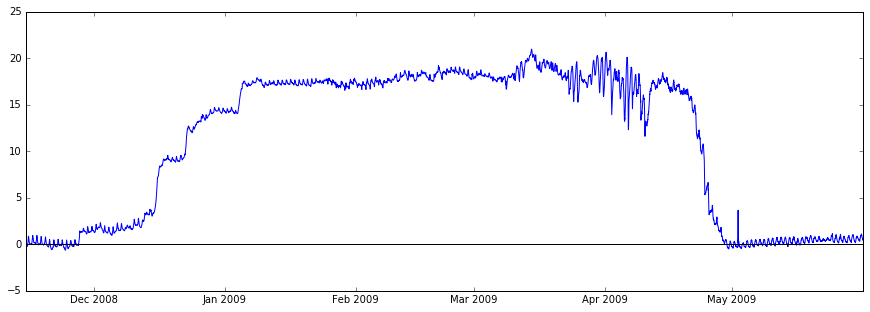

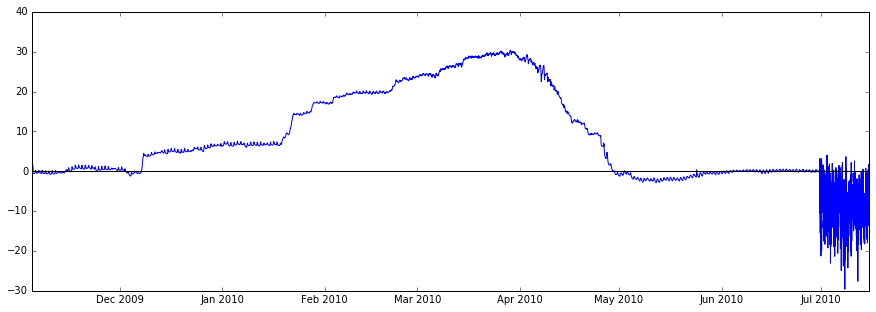

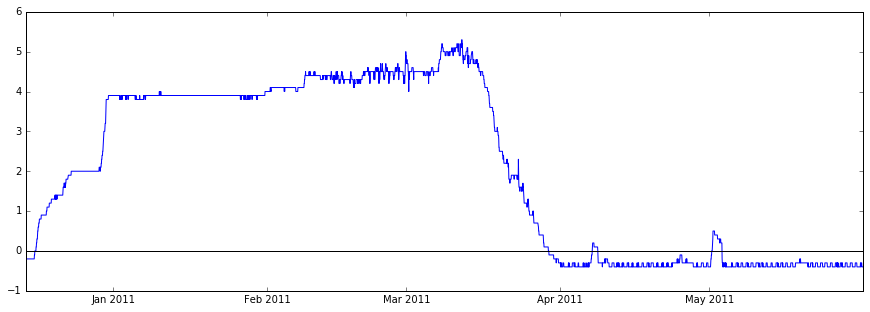

In [33]:
for wy in np.arange(2009,2012):
    strt = '%s-10-01 00:00'%(wy-1)
    nd = '%s-09-30 23:00'%(wy)
    plt.figure(figsize=(15,5))
    plt.plot(swe[strt:nd].index,swe[strt:nd].swe,'-b')
    plt.axhline(0,c='k')

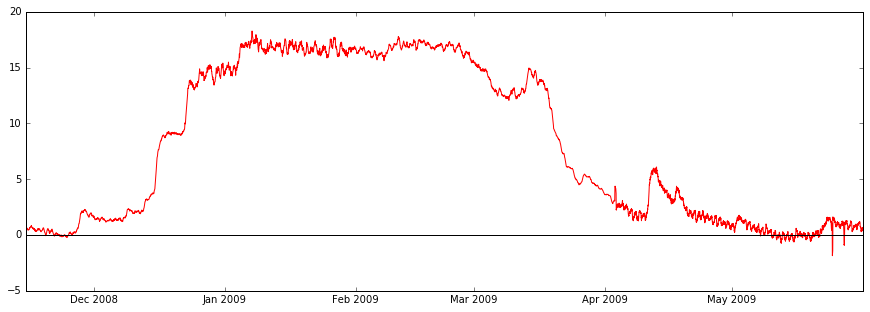

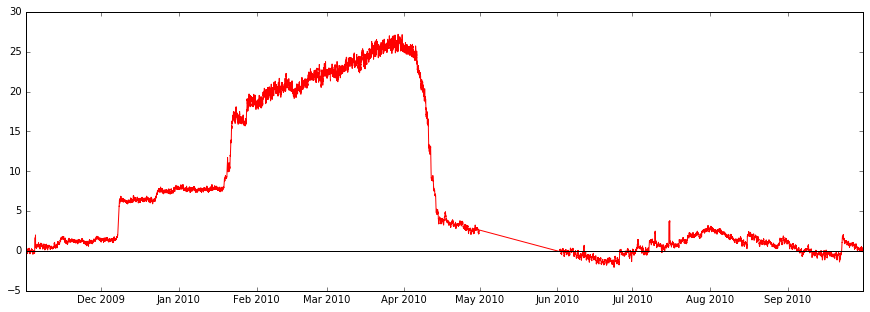

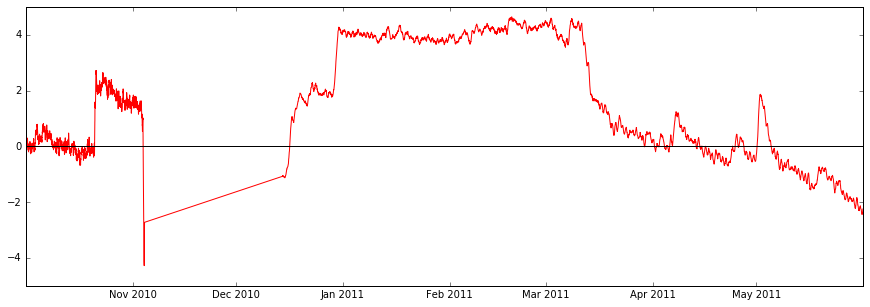

In [35]:
for wy in np.arange(2009,2012):
    strt = '%s-10-01 00:00'%(wy-1)
    nd = '%s-09-30 23:00'%(wy)
    plt.figure(figsize=(15,5))
    plt.plot(cr_swe[strt:nd].index,cr_swe[strt:nd].cr_swe,'-r')
    plt.axhline(0,c='k')

### Clean the Snow Pillow SWE

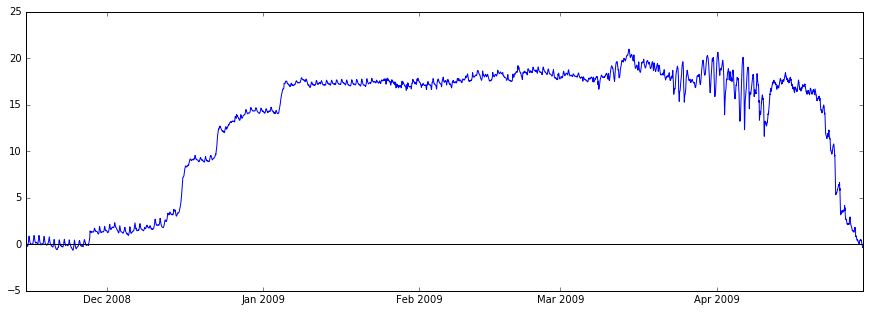

In [49]:
wy = 2009
strt = '%s-10-01 00:00'%(wy-1)
nd = '%s-09-30 23:00'%(wy)
plt.figure(figsize=(15,5))
plt.plot(swe[strt:nd].index,swe[strt:nd].swe,'-b')
plt.axhline(0,c='k')
plt.axvline('2009-04-30')

In [48]:
swe.loc['2009-04-30':nd,'swe'] = np.NaN

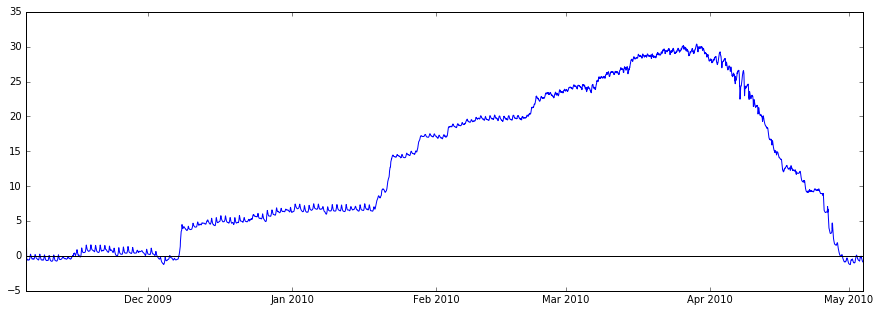

In [55]:
wy = 2010
strt = '%s-10-01 00:00'%(wy-1)
nd = '%s-09-30 23:00'%(wy)
plt.figure(figsize=(15,5))
plt.plot(swe[strt:nd].index,swe[strt:nd].swe,'-b')
plt.axhline(0,c='k')
plt.axvline('2010-05-04')

In [54]:
swe.loc['2010-05-04':nd,'swe'] = np.NaN

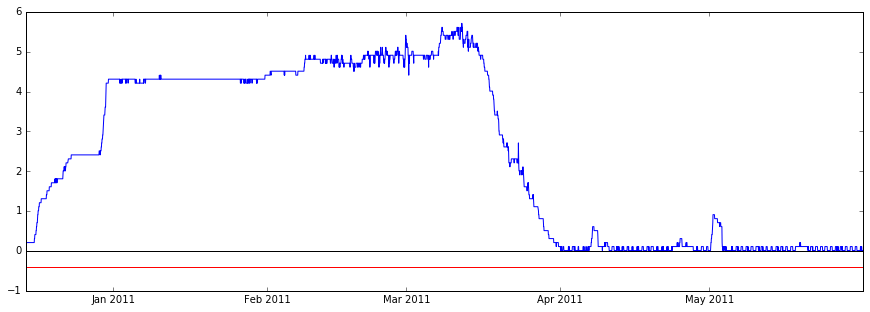

In [68]:
wy = 2011
strt = '%s-10-01 00:00'%(wy-1)
nd = '%s-09-30 23:00'%(wy)
plt.figure(figsize=(15,5))
plt.plot(swe[strt:nd].index,swe[strt:nd].swe,'-b')
plt.axhline(0,c='k')
plt.axhline(-0.41,c='r')

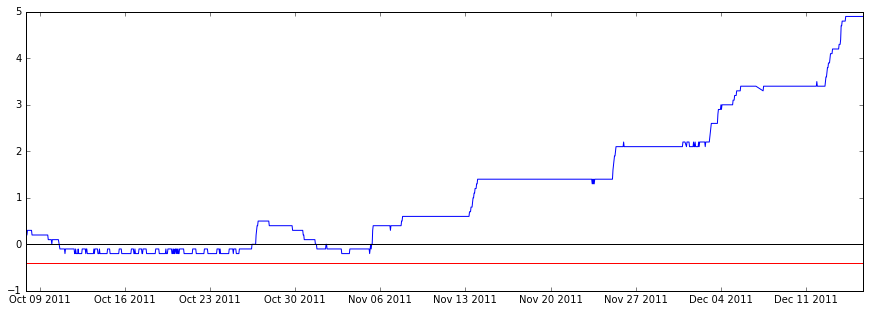

In [69]:
wy = 2012
strt = '%s-10-01 00:00'%(wy-1)
nd = '%s-09-30 23:00'%(wy)
plt.figure(figsize=(15,5))
plt.plot(swe[strt:nd].index,swe[strt:nd].swe,'-b')
plt.axhline(0,c='k')
plt.axhline(-0.41,c='r')

In [70]:
swe.loc[strt:nd,'swe'] = np.NaN

### Read in the Cosmos SWE from the website

http://cosmos.hwr.arizona.edu/Probes/StationDat/019/index.php

In [108]:
d = pd.read_table('./data/cosmos_swe.txt',delim_whitespace=True)

In [109]:
d = d.iloc[2:]

In [110]:
d['dt'] = d['YYYY-MM-DD']+' '+d['HH:MM']
del d['YYYY-MM-DD']
del d['HH:MM']

In [111]:
d.columns

Index([u'MOD', u'UNMO', u'PRESS', u'TEM', u'RH', u'BATT', u'BMOD', u'BUNM',
       u'ETE', u'ERH', u'SNOW', u'SWE', u'dt'],
      dtype='object')

In [112]:
d.index = pd.DatetimeIndex(d.dt)

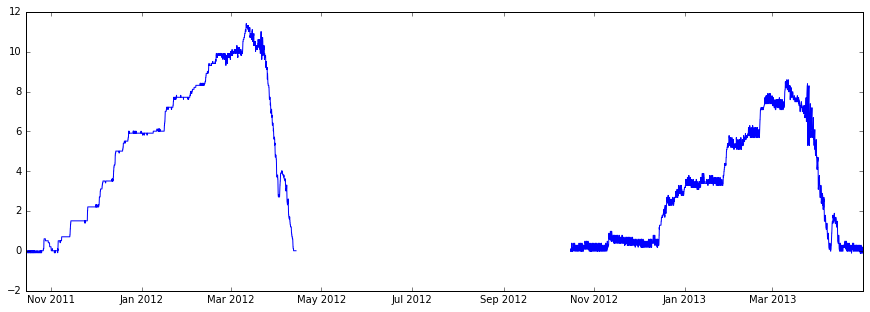

In [153]:
plt.figure(figsize=(15,5))
plt.plot(d.index,d.SWE)

In [114]:
d.loc['2010-10-01':'2011-09-30'] = np.NaN # remove un needed data

In [115]:
d.loc['2013-10-01':] = np.NaN # remove un needed data

In [117]:
d.dropna(inplace=True)

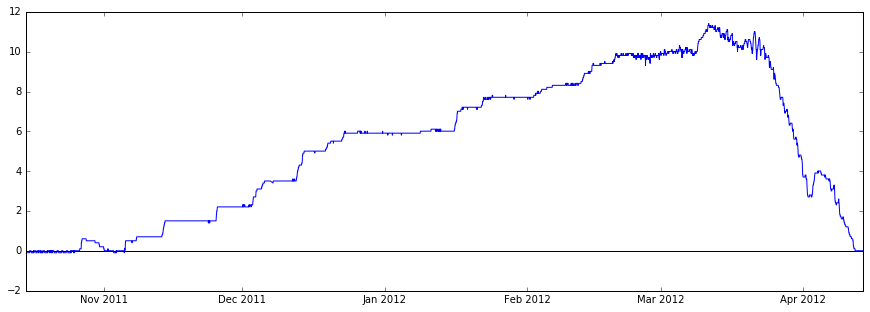

In [137]:
wy = 2012
strt = '%s-10-01 00:00'%(wy-1)
nd = '%s-09-30 23:00'%(wy)
plt.figure(figsize=(15,5))
plt.plot(d[strt:nd].index,d[strt:nd].SWE,'-b')
plt.axhline(0,c='k')
plt.axvline('2012-04-14',c='r')

In [120]:
d.loc[strt:nd,'SWE'] += 0.41

In [128]:
d.loc[strt:'2011-10-14','SWE'] = np.NaN

In [136]:
d.loc['2012-04-14':nd,'SWE'] = np.NaN

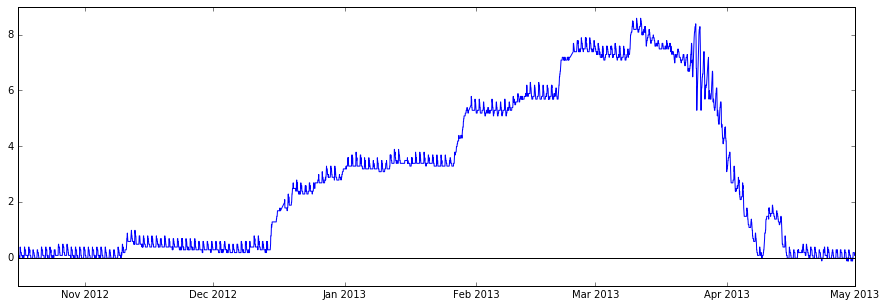

In [152]:
wy = 2013
strt = '%s-10-01 00:00'%(wy-1)
nd = '%s-09-30 23:00'%(wy)
plt.figure(figsize=(15,5))
plt.plot(d[strt:nd].index,d[strt:nd].SWE,'-b')
plt.axhline(0,c='k')
plt.axvline('2013-05-01',c='r')

In [144]:
d.loc[strt:nd,'SWE'] -= 4.51

In [148]:
d.loc['2013-05-01':nd,'SWE'] = np.NaN

In [151]:
d.loc[strt:'2012-10-15','SWE'] = np.NaN

In [154]:
tmp = pd.DataFrame({'swe':d.SWE})

In [156]:
swe = swe.append(tmp)

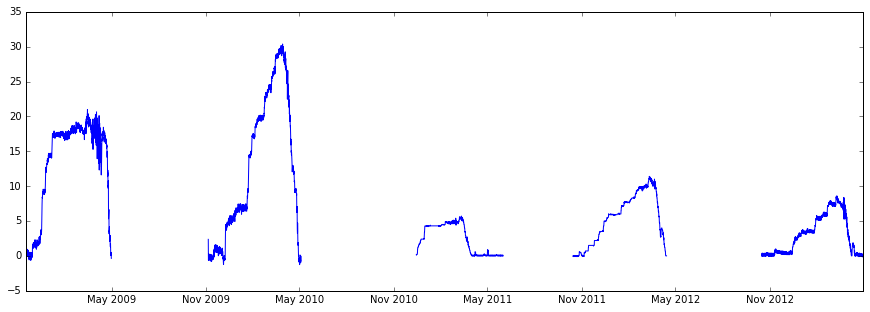

In [161]:
plt.figure(figsize=(15,5))
plt.plot(swe.index,swe.swe)

In [163]:
swe2 = swe.resample('D')

In [164]:
#swe2.to_pickle('./data/Vcm_cosmos_pillow_swe.pcl')